In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('../../data/kosdaq/combined/025870.csv', index_col=0)
dates = df['period']
df = df.set_index(df['period'])
df = df[['price', 'volume', 'ratio']]
df.shape

(1364, 3)

In [44]:
df.head()

,price,volume,ratio
period,,,
2016-01-01,6480.0,4625.0,0.13513
2016-01-02,6480.0,4625.0,0.04978
2016-01-03,6480.0,4625.0,0.11379
2016-01-04,6390.0,2989.0,0.81081
2016-01-05,6350.0,4931.0,0.96728


## Original Values

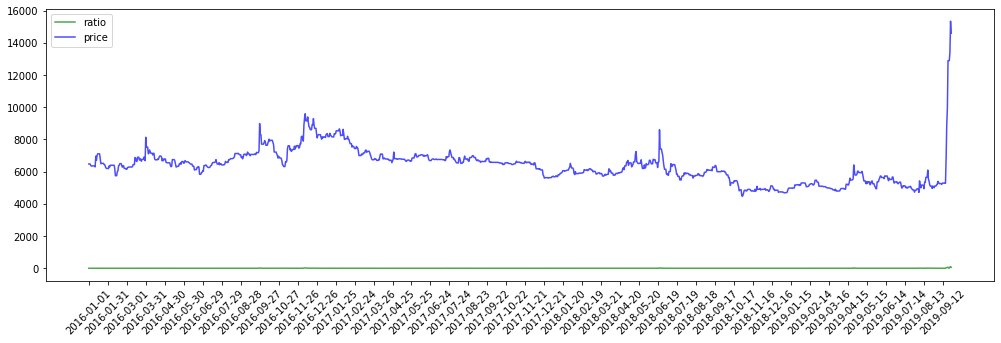

In [45]:
fig, ax = plt.subplots(1,1, figsize=(17,5))
ax.plot(dates,df['ratio'], label="ratio", color='green', alpha=0.7)
ax.plot(dates,df['price'], label="price", color='blue', alpha=0.7)
# ax.plot(dates,scaled['volume'], label="volume", color='orange')
ax.set_xticks(dates[::30])
ax.set_xticklabels(dates[::30], rotation=45)
ax.legend()

## Scaled Values

In [46]:
scaled = df-df.min()
scaled /= scaled.max()

In [47]:
scaled.head()

,price,volume,ratio
period,,,
2016-01-01,0.184743,0.000845,0.000996
2016-01-02,0.184743,0.000845,0.000142
2016-01-03,0.184743,0.000845,0.000783
2016-01-04,0.176471,0.000488,0.007755
2016-01-05,0.172794,0.000912,0.009321


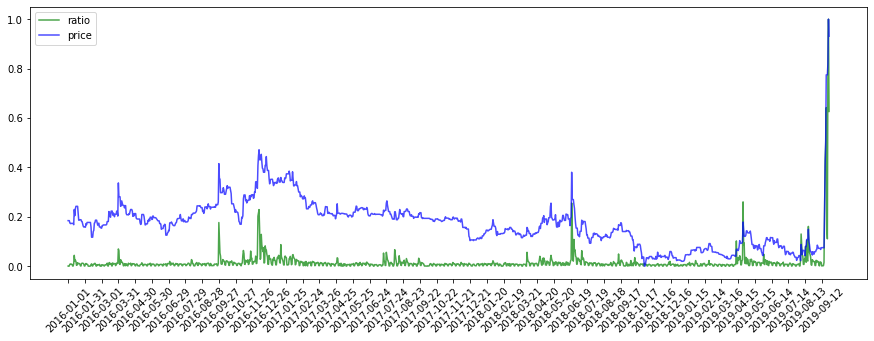

In [48]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(dates,scaled['ratio'], label="ratio", color='green', alpha=0.7)
ax.plot(dates,scaled['price'], label="price", color='blue', alpha=0.7)
# ax.plot(dates,scaled['volume'], label="volume", color='orange')
ax.set_xticks(dates[::30])
ax.set_xticklabels(dates[::30], rotation=45)
ax.legend()

In [6]:
pct = df.pct_change()
# pct = pct.abs()
pct.head()
pct = pct.replace([np.inf, -np.inf], np.nan)
pct = pct.dropna()
pct_dates = pct.index

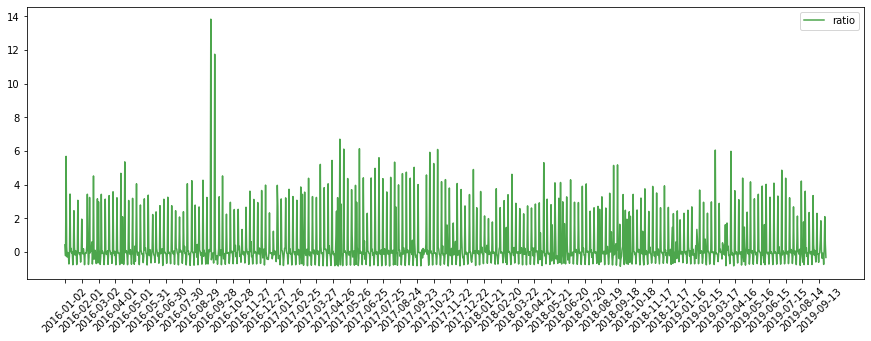

In [8]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(pct_dates, pct['ratio'], label="ratio", color='green',  alpha=0.7)
# ax.plot(pct_dates, pct['price'], label="price", color='blue', alpha=0.7)
# ax.plot(pct_dates,pct['volume'], label="volume", color='orange')
ax.set_xticks(pct_dates[::30])
ax.set_xticklabels(pct_dates[::30], rotation=45)
ax.legend()